# Hierarchical Clustering
#### Math 3480 - Machine Learning - Dr. Michael E. Olson

## Reading
* Brunton, Section 5.4
* Leskovec, 7.2
* Geron, Chapter x


### Additional Resources
* [YouTube: Serrano Academy - Clustering: K-means and Hierarchical](https://www.youtube.com/watch?v=QXOkPvFM6NU)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Theory
In the K-Means and Gaussian Mixture Models, we start with a point and then find all the points within a certain radius of that point. This works very well for circular grouping. But what if one group is actually wrapped around another dataset? Two common algorithms that help with more oddly-shaped groups are DBSCAN and Hierarchical Clustering

When we visually see datapoints, our eye naturally groups these data into groups based on how close points are to each other (visual density). DBSCAN mimicks this behavior.

The idea is to combine the two closest points into a cluster. Then, combine the next two closest points, and continue. If one of the two closest points is within a cluster already, then you merge the other point with that cluster.

## Algorithm

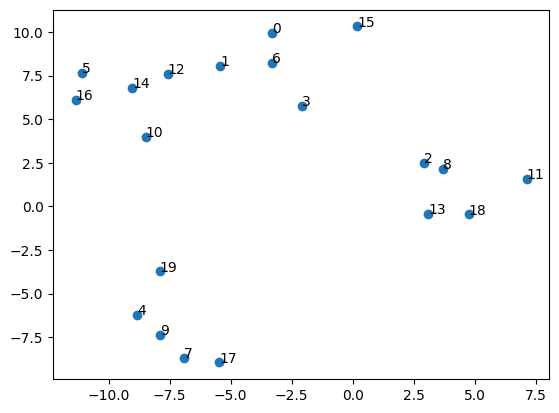

In [2]:
# Set up the data
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 20, n_features = 2, centers = 4, cluster_std = 1.7, random_state = 42)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

for i, txt in enumerate(range(20)):
    ax.annotate(txt, (X[i,0], X[i,1]))

It often helps to first look at a __Dendrogram__
1. Connect the first two points. This becomes the first bracket, whose height is the distance between the two points.
2. Do the same with the next two points.
3. Continue until all points have been clustered
4. Determine where to make the cut (how many clusters do you want?)

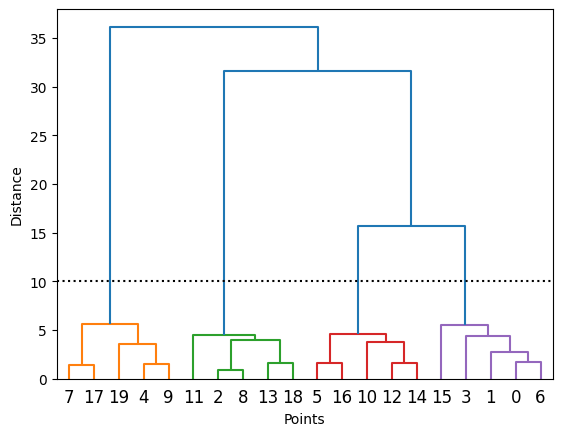

In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

limit = 10
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), color_threshold=limit)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.axhline(y=limit, linestyle=':', color='black')

Now, we make the model. The arguments for `AgglomerativeClustering` that we need to discuss are:
* `n_clusters`: How many groups we make
* `affinity`: The way that distances are measured
    * 'eclidean' distance (default), 'l1' norm, 'l2' norm, 'manhattan', 'cosine'
* `linkage`: The linkage criterion to use
    * 'ward' minimizes the variance of the clusters being merged
    * 'average’ uses the average of the distances of each observation of the two se
    * 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two 
    * 'single' uses the minimum of the distances between all observations of the two sets.

/home/meo/.virtualenvs/MachineLearning/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


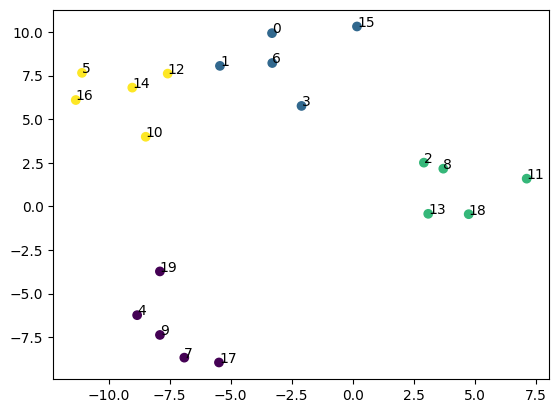

In [4]:
k = 4

h_cluster = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage='ward')
y_predict = h_cluster.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y_predict)

for i, txt in enumerate(range(20)):
    ax.annotate(txt, (X[i,0], X[i,1]))

#### Another example with oddly-shaped groups

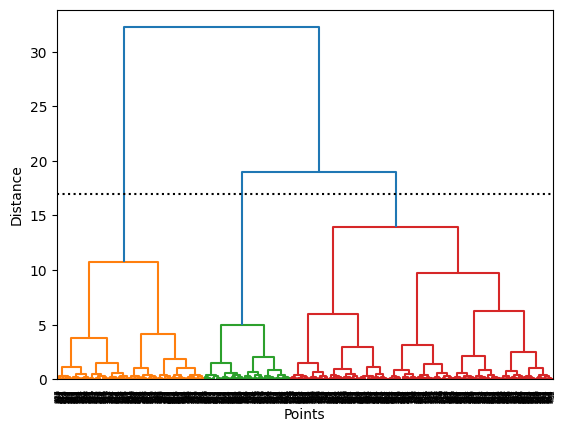

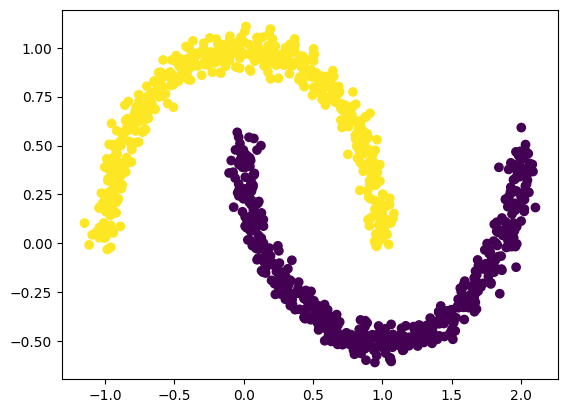

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.05)

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

linkage_method = 'ward'
#linkage_method = 'single'

limit = 17
dendrogram = sch.dendrogram(sch.linkage(X, method=linkage_method), color_threshold=limit)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.axhline(y=limit, linestyle=':', color='black')

plt.show()

k = 2

h_cluster = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
y_predict = h_cluster.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y_predict)
plt.show()

## Limits of Hierarchical Clustering